Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [3]:
df = pd.read_csv('Framingham original.csv')

In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
#no of rows and columns
df.shape

(4238, 16)

In [13]:
#checking null values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
#fetching the null value rows
null = df[df.isna().any(axis=1)]
null

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


Individual attributes graph

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

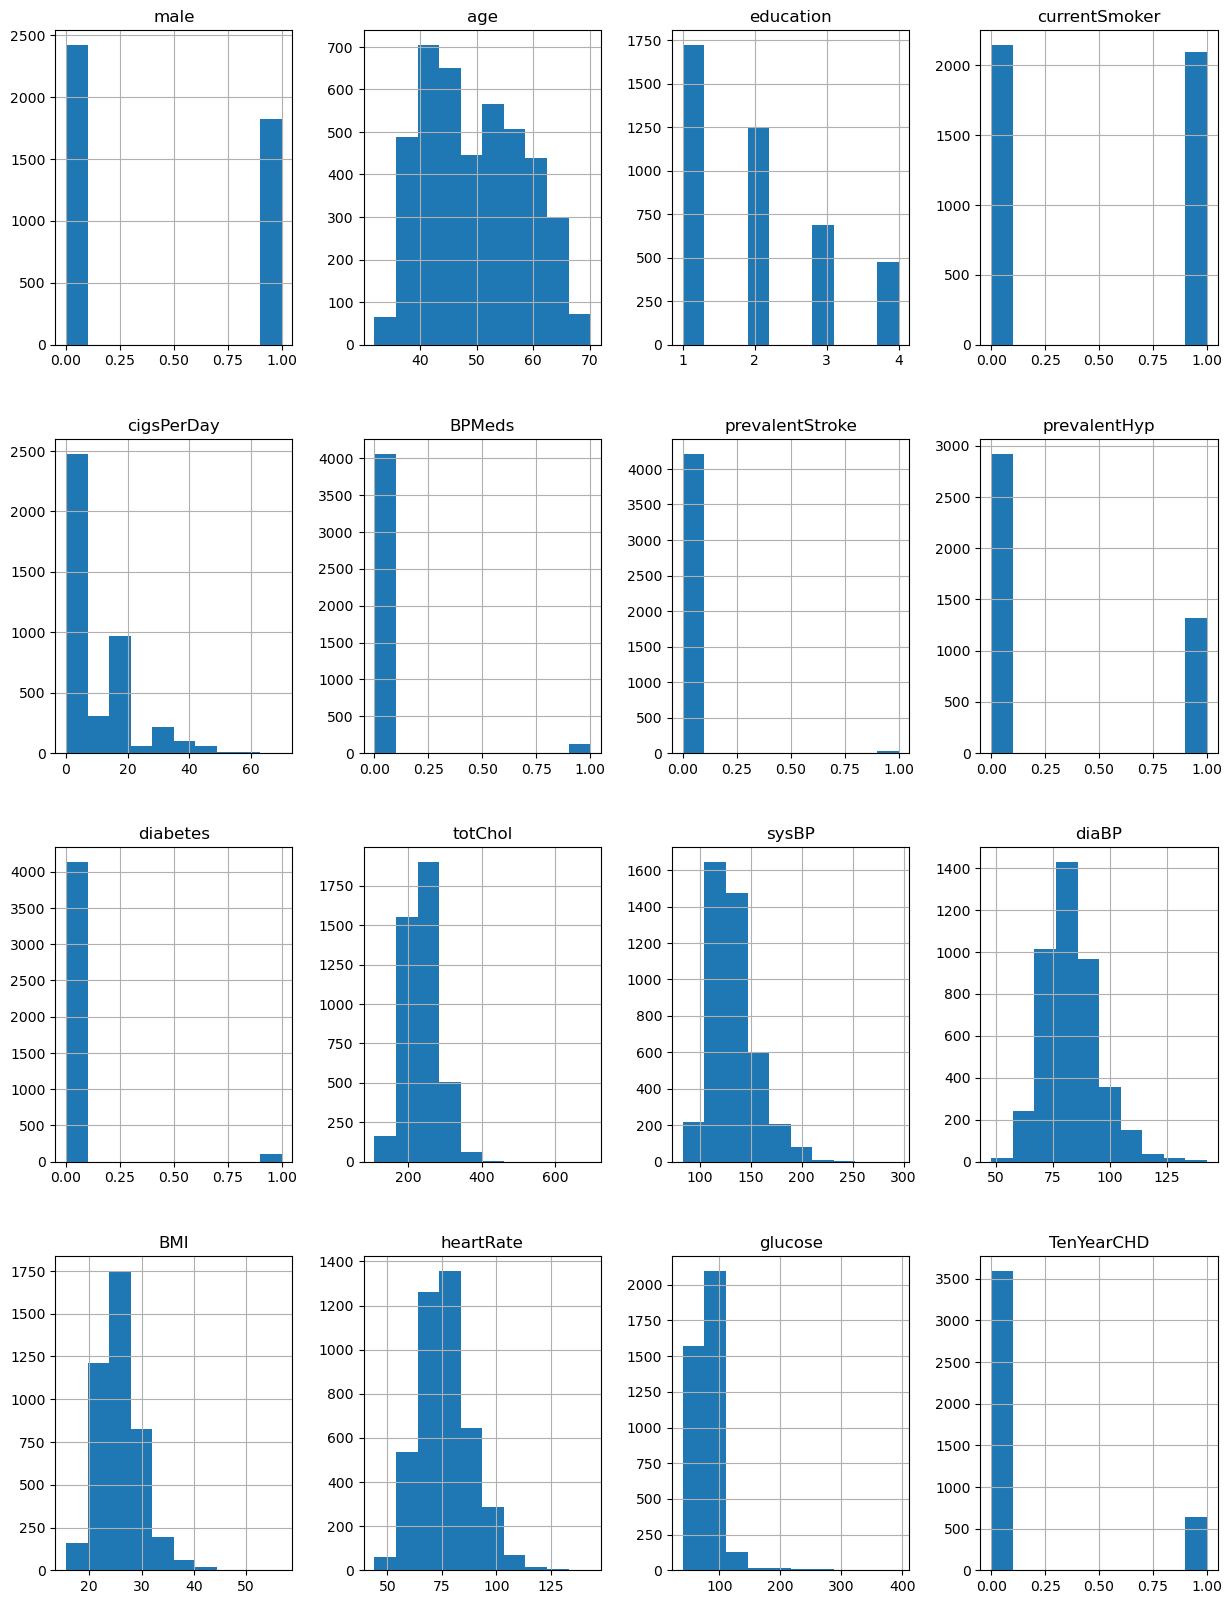

In [18]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [19]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Replacing null values with zero

In [23]:
df['education'].fillna(0,inplace=True)
df['cigsPerDay'].fillna(0,inplace=True)
df['BPMeds'].fillna(0,inplace=True)
df['totChol'].fillna(0,inplace=True)
df['BMI'].fillna(0,inplace=True)
df['heartRate'].fillna(0,inplace=True)
df['glucose'].fillna(0,inplace=True)

In [25]:
df['glucose'].isnull().values.any()

False

In [27]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [29]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0.0,0


In [31]:
# Encoding categorical to numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
df['male']=le.fit_transform(df['male'])
df['age']=le.fit_transform(df['age'])
df['education']=le.fit_transform(df['education'])
df['currentSmoker']=le.fit_transform(df['currentSmoker'])
df['cigsPerDay']=le.fit_transform(df['cigsPerDay'])
df['BPMeds']=le.fit_transform(df['BPMeds'])
df['prevalentStroke']=le.fit_transform(df['prevalentStroke'])
df['prevalentHyp']=le.fit_transform(df['prevalentHyp'])
df['diabetes']=le.fit_transform(df['diabetes'])
df['totChol']=le.fit_transform(df['totChol'])
df['sysBP']=le.fit_transform(df['sysBP'])
df['diaBP']=le.fit_transform(df['diaBP'])
df['BMI']=le.fit_transform(df['BMI'])
df['heartRate']=le.fit_transform(df['heartRate'])
df['glucose']=le.fit_transform(df['glucose'])

In [35]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,7,4,0,0,0,0,0,0,60,31,33,748,36,33,0
1,0,14,2,0,0,0,0,0,0,115,61,55,898,51,32,0
2,1,16,1,1,20,0,0,0,0,110,74,53,596,31,26,0
3,0,29,3,1,24,0,0,1,0,90,119,83,884,21,59,1
4,0,14,3,1,21,0,0,0,0,150,79,61,388,41,41,0


In [37]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,18,1,1,1,0,0,1,0,178,174,77,653,22,42,1
4234,1,19,3,1,28,0,0,0,0,72,72,53,118,21,24,0
4235,0,16,2,1,20,0,0,0,0,113,81,37,296,40,42,0
4236,0,12,1,1,15,0,0,0,0,75,72,67,84,42,0,0
4237,0,20,2,0,0,0,0,0,0,134,86,59,252,36,63,0


In [39]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,17.584946,1.929920,0.494101,7.968853,0.029259,0.005899,0.310524,0.025720,100.275838,83.214724,58.683341,618.853233,31.818546,33.581170,0.151958
std,0.495022,8.572160,1.053018,0.500024,9.736920,0.168552,0.076587,0.462763,0.158316,44.200224,42.376535,23.347601,313.510397,11.832414,19.025948,0.359023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,53.000000,43.000000,383.000000,24.000000,24.000000,0.000000
50%,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,75.000000,57.000000,600.000000,31.000000,33.000000,0.000000
75%,1.000000,24.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,127.000000,107.000000,72.750000,838.750000,39.000000,41.000000,0.000000
max,1.000000,38.000000,4.000000,1.000000,32.000000,1.000000,1.000000,1.000000,1.000000,248.000000,233.000000,145.000000,1363.000000,73.000000,143.000000,1.000000


In [41]:
#Data Correlation
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.009271,0.197596,0.306119,-0.051545,-0.004546,0.005313,0.015708,-0.054147,-0.033220,0.060058,0.118955,-0.117012,0.050691,0.088428
age,-0.028979,1.000000,-0.162404,-0.213748,-0.206488,0.120955,0.057655,0.307194,0.101258,0.253776,0.397583,0.206953,0.136564,-0.014921,0.119148,0.225256
education,0.009271,-0.162404,1.000000,0.020058,0.013437,-0.009721,-0.029991,-0.074963,-0.037320,-0.017236,-0.122491,-0.062140,-0.137039,-0.043338,-0.037089,-0.051109
currentSmoker,0.197596,-0.213748,0.020058,1.000000,0.828227,-0.048358,-0.032988,-0.103260,-0.044295,-0.054063,-0.130227,-0.107530,-0.169268,0.064024,-0.063782,0.019456
cigsPerDay,0.306119,-0.206488,0.013437,0.828227,1.000000,-0.045895,-0.031719,-0.081870,-0.034695,-0.038678,-0.103972,-0.073289,-0.118000,0.077101,-0.062917,0.054083
BPMeds,-0.051545,0.120955,-0.009721,-0.048358,-0.045895,1.000000,0.114609,0.258697,0.051394,0.072762,0.247804,0.193134,0.090003,0.013550,0.031642,0.086417
prevalentStroke,-0.004546,0.057655,-0.029991,-0.032988,-0.031719,0.114609,1.000000,0.074830,0.006949,0.004609,0.059168,0.046450,-0.000072,-0.017570,0.024534,0.061810
prevalentHyp,0.005313,0.307194,-0.074963,-0.103260,-0.081870,0.258697,0.074830,1.000000,0.077808,0.157400,0.707140,0.620376,0.290849,0.146327,0.085088,0.177603
diabetes,0.015708,0.101258,-0.037320,-0.044295,-0.034695,0.051394,0.006949,0.077808,1.000000,0.033996,0.109359,0.048816,0.071598,0.049739,0.452946,0.097317
totChol,-0.054147,0.253776,-0.017236,-0.054063,-0.038678,0.072762,0.004609,0.157400,0.033996,1.000000,0.202516,0.163986,0.124835,0.080930,0.078575,0.075708


In [43]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [45]:
# Applying Scaling on x
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [47]:
x=scale.fit_transform(x)

In [49]:
x

array([[1.        , 0.18421053, 1.        , ..., 0.54878944, 0.49315068,
        0.23076923],
       [0.        , 0.36842105, 0.5       , ..., 0.65884079, 0.69863014,
        0.22377622],
       [1.        , 0.42105263, 0.25      , ..., 0.43727073, 0.42465753,
        0.18181818],
       ...,
       [0.        , 0.42105263, 0.5       , ..., 0.21716801, 0.54794521,
        0.29370629],
       [0.        , 0.31578947, 0.25      , ..., 0.06162876, 0.57534247,
        0.        ],
       [0.        , 0.52631579, 0.5       , ..., 0.18488628, 0.49315068,
        0.44055944]])

In [152]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

# Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(x_train,y_train)
pred=lor.predict(x_test)

In [157]:
lr=accuracy_score(pred,y_test)*100
lre=100-lr
print("Accuracy:",lr)
print("Error Rate:",lre)

Accuracy: 84.15094339622642
Error Rate: 15.849056603773576


Prediction

In [160]:
dt = np.array([[0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103]])
lpred = lor.predict(dt)
lpred

array([1], dtype=int64)

Confusion matrix

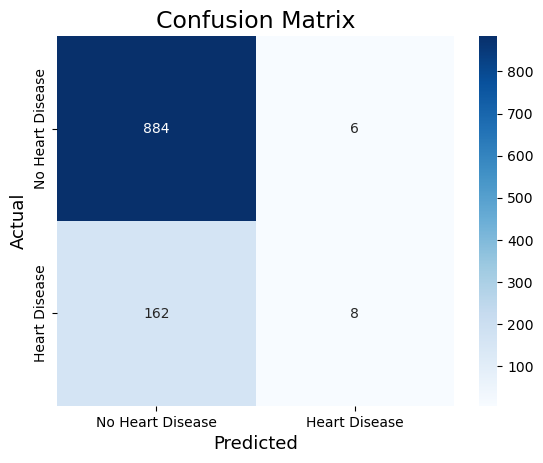

In [163]:
cm = confusion_matrix(y_test,pred)

sns.heatmap(cm,
            cmap='Blues',
    annot=True,
    fmt='g',
    xticklabels=['No Heart Disease','Heart Disease'],
    yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Logistic regression Model Save

In [166]:
import pickle
pickle.dump(lor,open("logreg.pkl","wb"))

# KNN

In [169]:
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
scores=[]
for k in range(1,30):
    classifier=KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train,y_train)
    sc=classifier.score(x_test,y_test)
    scores.append(sc)
k=scores.index(max(scores))+1 
classifier=KNeighborsClassifier(n_neighbors = k)
classifier.fit(x_train,y_train)
dtpred=classifier.predict(x_test)

In [170]:
knn=accuracy_score(dtpred,y_test)*100
knne=100-knn
print("Accuracy:",knn)
print("Error Rate:",knne)

Accuracy: 84.33962264150944
Error Rate: 15.660377358490564


prediction

In [176]:
dt = np.array([[0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103]])
kpred = classifier.predict(dt)
kpred

array([1], dtype=int64)

confusion matrix

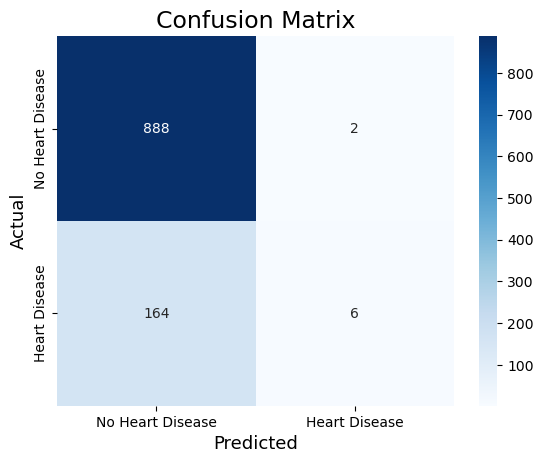

In [76]:
cm = confusion_matrix(y_test,dtpred)

sns.heatmap(cm,
            cmap='Blues',
    annot=True,
    fmt='g',
    xticklabels=['No Heart Disease','Heart Disease'],
    yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

KNN Model Save

In [79]:
pickle.dump(classifier,open("knn.pkl","wb"))

# Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
dpred=gnb.predict(x_test)

In [84]:
naive=accuracy_score(dpred,y_test)*100
naivee=100-naive
print("Accuracy:",naive)
print("Error Rate:",naivee)

Accuracy: 81.98113207547169
Error Rate: 18.01886792452831


prediction

In [87]:
dt = np.array([[0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103]])
npred = gnb.predict(dt)
npred

array([1], dtype=int64)

confusion matrix

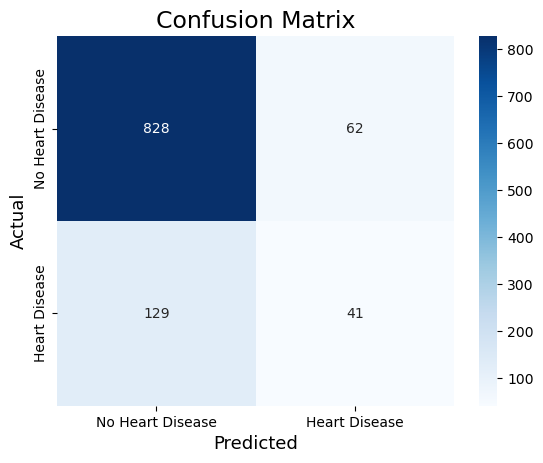

In [90]:
cm = confusion_matrix(y_test,dpred)

sns.heatmap(cm,
            cmap='Blues',
    annot=True,
    fmt='g',
    xticklabels=['No Heart Disease','Heart Disease'],
    yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Naive Bayes Model Save

In [93]:
pickle.dump(gnb,open("naive.pkl","wb"))

# Support Vector Machine

In [96]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [97]:
svm=accuracy_score(y_pred,y_test)*100
svme=100-svm
print("Accuracy :",svm)
print("Error Rate:",svme)

Accuracy : 84.15094339622642
Error Rate: 15.849056603773576


prediction

In [101]:
dt = np.array([[0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103]])
npred = clf.predict(dt)
npred

array([0], dtype=int64)

confusion matrix

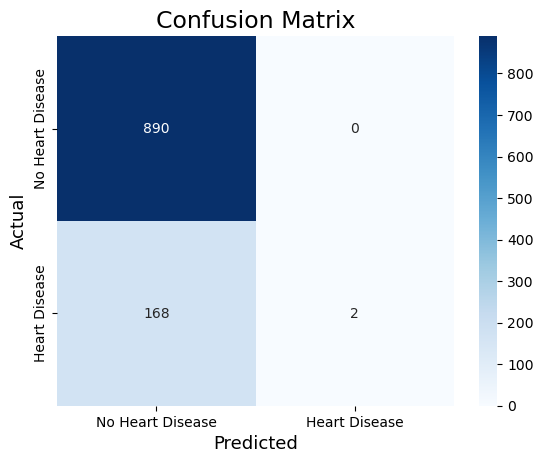

In [104]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,
            cmap='Blues',
    annot=True,
    fmt='g',
    xticklabels=['No Heart Disease','Heart Disease'],
    yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Support Vector Machine model Save

In [107]:
pickle.dump(clf,open("svm.pkl","wb"))

# Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=12, max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)

In [111]:
rf_acc_score = accuracy_score(rf_predicted,y_test)
rfa=rf_acc_score*100
rfe=100-rfa
print("Accuracy:",rfa)
print("Error Rate:",rfe)

Accuracy: 83.9622641509434
Error Rate: 16.037735849056602


prediction

In [115]:
data = np.array([[0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103]])
pred = rf.predict(data)
pred

array([1], dtype=int64)

confusion matrix

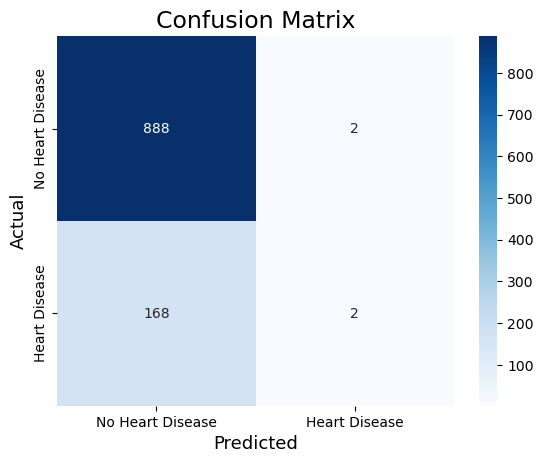

In [118]:
cm = confusion_matrix(y_test,rf_predicted)

sns.heatmap(cm,
            cmap='Blues',
    annot=True,
    fmt='g',
    xticklabels=['No Heart Disease','Heart Disease'],
    yticklabels=['No Heart Disease','Heart Disease'])
plt.xlabel('Predicted',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Random Forest Model Save

In [121]:
pickle.dump(rf,open("ranfor.pkl","wb"))

In [123]:
X = ['Naive Bayes','RF','SVM','KNN','Logistic Regression']
Accuracy = [naive,rfa,svm,knn,lr]
error = [naivee,rfe,svme,knne,lre]
print(X)
print(Accuracy)
print(error)

['Naive Bayes', 'RF', 'SVM', 'KNN', 'Logistic Regression']
[81.98113207547169, 83.9622641509434, 84.15094339622642, 84.33962264150944, 84.15094339622642]
[18.01886792452831, 16.037735849056602, 15.849056603773576, 15.660377358490564, 15.849056603773576]


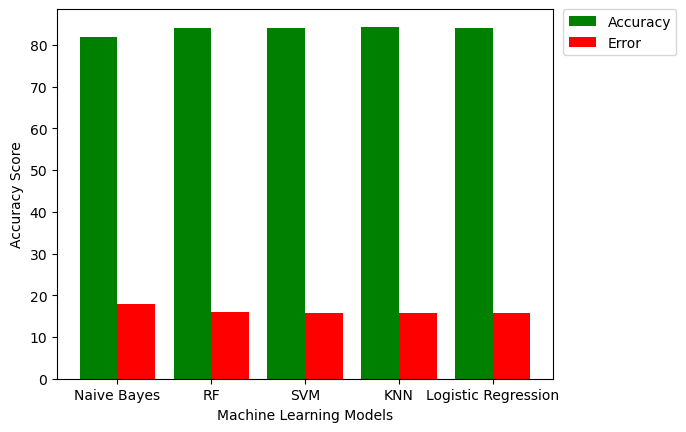

In [125]:
X_axis = np.arange(5) 
plt.bar(X_axis - 0.2, Accuracy, 0.4, label = 'Accuracy',color='g')
plt.bar(X_axis + 0.2, error, 0.4, label = 'Error',color='r')
plt.xticks(X_axis, X)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()